In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def show_image(title, img, cmap=None):
    plt.figure(figsize=(6, 6))
    plt.title(title)
    plt.imshow(img, cmap=cmap)
    plt.axis("off")
    plt.show()

1. Загрузка и отображение изображения

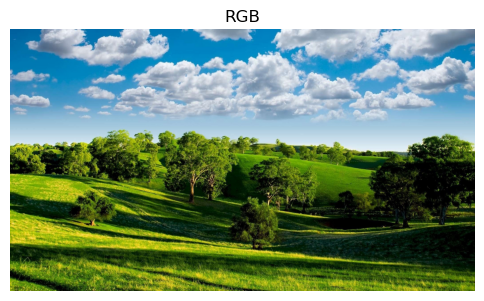

In [5]:
image = cv2.imread("pic1.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
show_image("RGB", image)

2. Преобразование цветовых пространств

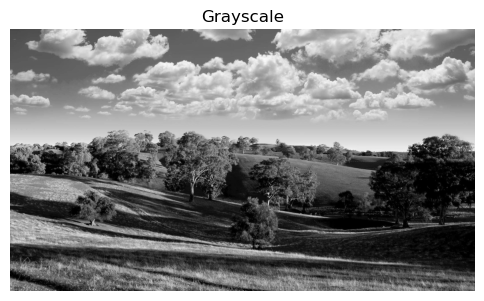

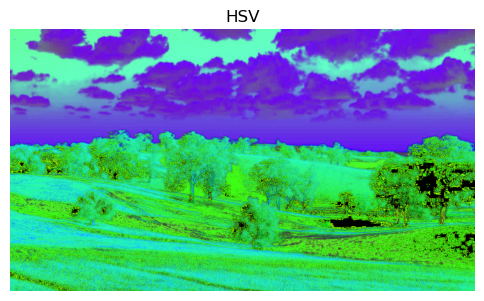

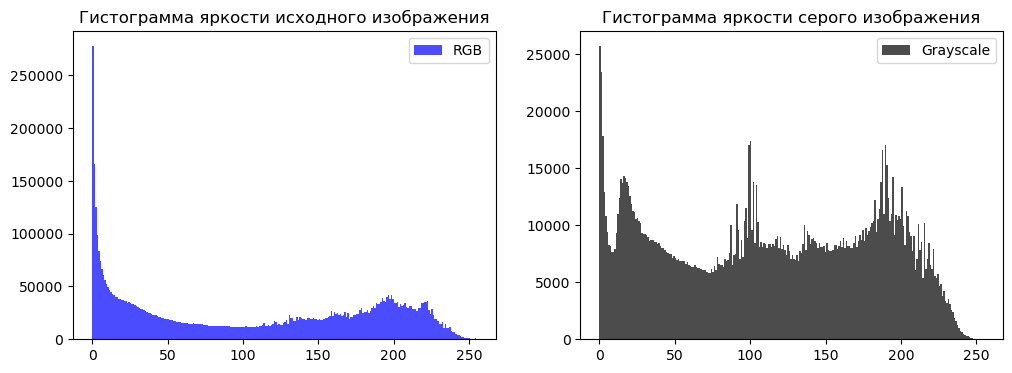

In [6]:
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

show_image("Grayscale", gray_image, cmap="gray")
show_image("HSV", hsv_image)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(image.ravel(), bins=256, color='blue', alpha=0.7, label='RGB')
plt.legend()
plt.title("Гистограмма яркости исходного изображения")

plt.subplot(1, 2, 2)
plt.hist(gray_image.ravel(), bins=256, color='black', alpha=0.7, label='Grayscale')
plt.legend()
plt.title("Гистограмма яркости серого изображения")

plt.show()

3. Фильтрация изображений

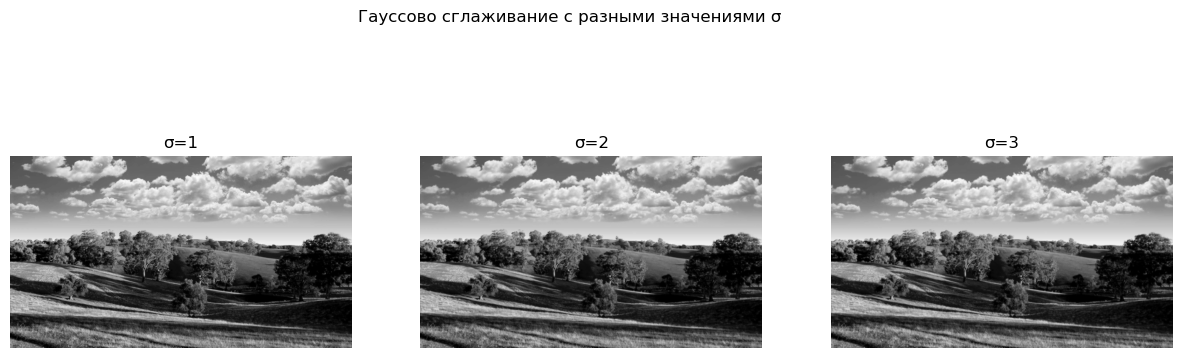

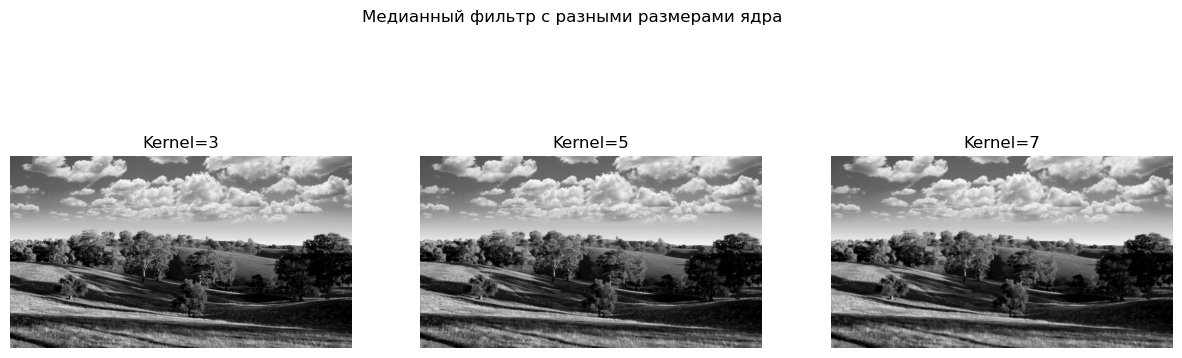

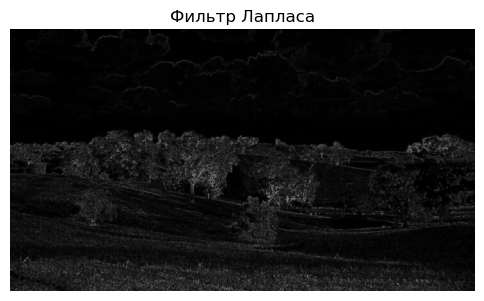

In [9]:
def show_images(title, images, labels, cmap=None):
    plt.figure(figsize=(15, 5))
    for i, (img, label) in enumerate(zip(images, labels)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(img, cmap=cmap)
        plt.title(label)
        plt.axis("off")
    plt.suptitle(title)
    plt.show()

# гауссово сглаживание
sigma_values = [1, 2, 3]
gaussian_blurs = [cv2.GaussianBlur(gray_image, (5, 5), sigma) for sigma in sigma_values]
show_images("Гауссово сглаживание с разными значениями σ ", gaussian_blurs, [f"σ={sigma}" for sigma in sigma_values], cmap="gray")

# медианный фильтр
kernel_sizes = [3, 5, 7]
median_blurs = [cv2.medianBlur(gray_image, k) for k in kernel_sizes]
show_images("Медианный фильтр с разными размерами ядра", median_blurs, [f"Kernel={k}" for k in kernel_sizes], cmap="gray")

# фильтр Лапласа
laplacian = cv2.Laplacian(gray_image, cv2.CV_64F)
laplacian = np.uint8(np.absolute(laplacian))
show_image("Фильтр Лапласа", laplacian, cmap="gray")

4. Выделение краев и углов

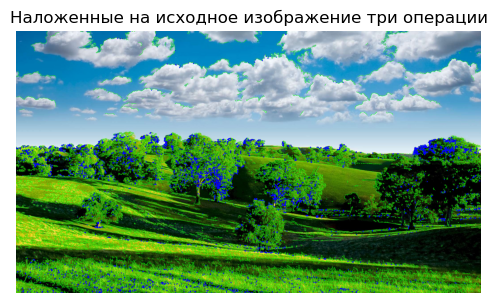

In [13]:
# оператор Собеля
sobelx = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.magnitude(sobelx, sobely)
sobel_combined = np.uint8(255 * sobel_combined / np.max(sobel_combined))

# алгоритм Кэнни
canny_edges = cv2.Canny(gray_image, 100, 200)

# детектор углов Harris
harris_corners = cv2.cornerHarris(np.float32(gray_image), 2, 3, 0.04)
harris_corners = cv2.dilate(harris_corners, None)

result_image = image.copy()
result_image[sobel_combined > 100] = [255, 0, 0]
result_image[canny_edges > 0] = [0, 255, 0]
result_image[harris_corners > 0.01 * harris_corners.max()] = [0, 0, 255] 
show_image("Наложенные на исходное изображение три операции", result_image)

5. Морфологические операции

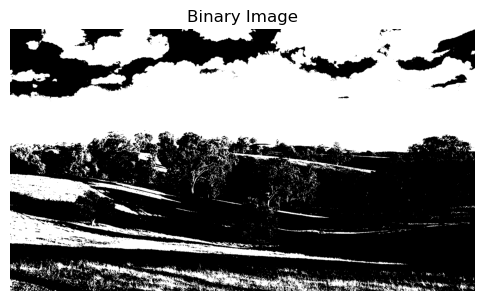

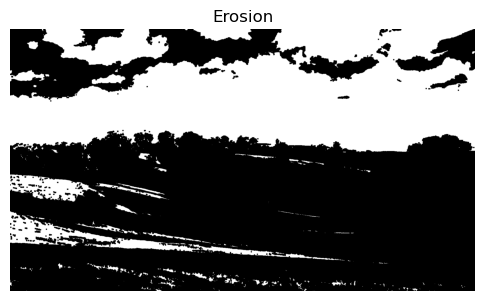

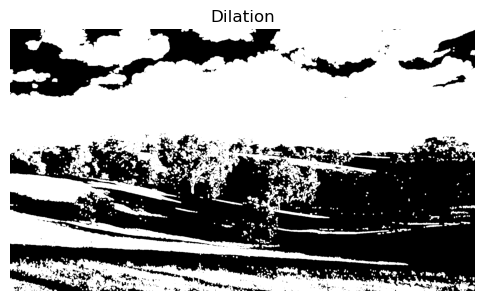

In [14]:
# бинаризация
_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
show_image("Binary Image", binary_image, cmap="gray")

# эрозия и дилатация
kernel = np.ones((5, 5), np.uint8)
eroded = cv2.erode(binary_image, kernel, iterations=1)
dilated = cv2.dilate(binary_image, kernel, iterations=1)

show_image("Erosion", eroded, cmap="gray")
show_image("Dilation", dilated, cmap="gray")
